In [10]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Carregando base de dados
df = pd.read_excel(r"C:\Users\alexa\OneDrive\Área de Trabalho\repositorios_git\DNC_repository\exe_regressao_linear_simples\base_aprovacao.xlsx")

In [3]:
# Verificando colunas
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [4]:
# Análise do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


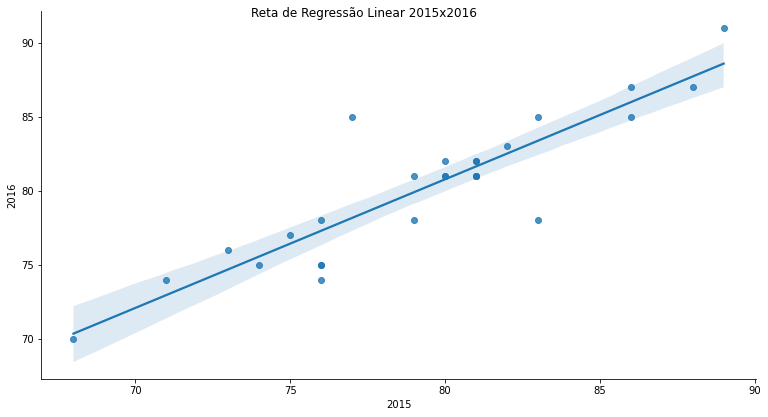

In [6]:
# análise gráfica
ax = sns.lmplot(x='ano_2015', y='ano_2016', data=df)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de Regressão Linear 2015x2016")
ax.set_xlabels("2015")
ax.set_ylabels("2016")
ax

In [8]:
# Correlação
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [12]:
# Definição treino e teste
Y = df.ano_2015
x = sm.add_constant(df.ano_2015)

In [13]:
# Resultado
resultado_regressao = sm.OLS(Y,x).fit()

In [14]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.564e+30
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:07:34   Log-Likelihood:                 820.71
No. Observations:                  27   AIC:                            -1637.
Df Residuals:                      25   BIC:                            -1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.862e-14   4.96e-14     -1.181      0.2

In [16]:
# Predição
df['predicao'] = resultado_regressao.predict()
df.head()

,UF,ano_2015,ano_2016,predicao
0,Rondonia,77,85,77.0
1,Acre,79,81,79.0
2,Amazonas,83,85,83.0
3,Roraima,81,82,81.0
4,Para,73,76,73.0


In [17]:
# Resíduo
df['residuo'] = df['predicao'] - df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,predicao,residuo
0,Rondonia,77,85,77.0,-8.0
1,Acre,79,81,79.0,-2.0
2,Amazonas,83,85,83.0,-2.0
3,Roraima,81,82,81.0,-1.0
4,Para,73,76,73.0,-3.0
